In [75]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
dataset=pd.read_csv('USArrests.csv')



In [77]:
dataset.rename(columns = {'Unnamed: 0':'State'}, inplace = True) 

In [78]:
dataset.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [79]:
x=dataset.iloc[:,1:].values
x

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091105, 50.52026552535069, 43.927464044975736, 40.52183461131976, 34.6873883978491, 32.70648136388185, 28.31163939712256]


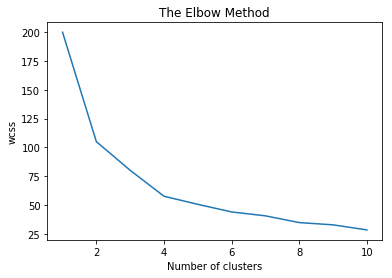

In [81]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #calculates the within cluster sum of square
print(wcss)              
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [82]:
#Apply k means to the mail dataset
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)
print(y_means)

[3 1 1 3 1 1 0 0 1 3 0 2 1 0 2 0 2 3 2 1 0 1 2 3 1 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 2 0]


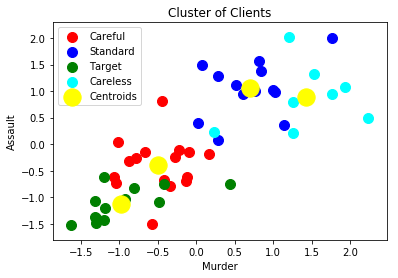

In [83]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='Standard')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='Target')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='Careless')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

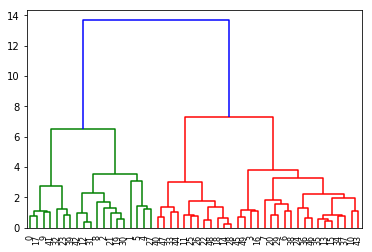

In [84]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method= 'ward', metric = 'euclidean'))

In [85]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters  = 2)

cluster.fit(x)
Y_pred_dendrogram = cluster.fit_predict(x)

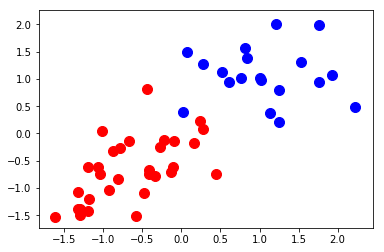

In [86]:
plt.scatter(x[Y_pred_dendrogram==0,0],x[Y_pred_dendrogram==0,1],s=100,c='red',label='Careful')
plt.scatter(x[Y_pred_dendrogram==1,0],x[Y_pred_dendrogram==1,1],s=100,c='blue',label='Standard')
